<a href="https://colab.research.google.com/github/adityafsyah/adtprojects/blob/main/SmartCity_Week1_SmartEconomy_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 - Import Library & Data

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/projects/dataprojects'

/content/drive/MyDrive/Colab Notebooks/projects/dataprojects


In [4]:
df = pd.read_csv("bakery_sales.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


* Dataset ini milik “The Bread Basket” toko roti yang berlokasi di Edinburgh.
* Dataset ini menyediakan detail transaksi pelanggan yang memesan berbagai item dari toko roti ini secara online selama periode waktu dari 30/10/2016 hingga 12/03/2017.

In [5]:
df.tail(5)

,TransactionNo,Items,DateTime,Daypart,DayType
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend
20506,9684,Smoothies,2017-09-04 15:04:24,Afternoon,Weekend


Memeriksa informasi data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


* Kita memiliki satu variabel sebagai integer yaitu "id transaksi"
* Variabel lainnya berupa string

Berapa banyak entri yang dimiliki data ini?

In [7]:
len(df)

20507

Copying the original data

In [8]:
df2 = df.copy()

* df akan digunakan untuk analisis eksplorasi
* df2 akan digunakan untuk mendeteksi pola yang sering muncul

### 2 - Preprocess the Data (For Visualization)

Splitting date-time to day,month and year

In [9]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

df["day"] = df["DateTime"].apply(lambda x : x.day)
df["month"] = df["DateTime"].apply(lambda x : x.month)
df["year"] = df["DateTime"].apply(lambda x : x.year)
# Extracting hour
df['hour'] = df['DateTime'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = df["DateTime"].apply(lambda x : days[x.weekday()])

* Untuk memvisualisasikan dengan lebih baik, kami membagi objek tanggal menjadi 3 bagian
* Kita akan membahas fitur hari, bulan, dan tahun secara terpisah
* Kami juga menambahkan fitur lain yang menunjukkan hari dalam seminggu

Menghilangkan fitur DateTime karena sudah dilakukan pembagian waktu

In [10]:
df = df.drop("DateTime", axis=1)
df.head(5)

,TransactionNo,Items,Daypart,DayType,day,month,year,hour,weekday
0,1,Bread,Morning,Weekend,30,10,2016,9-10,Sunday
1,2,Scandinavian,Morning,Weekend,30,10,2016,10-11,Sunday
2,2,Scandinavian,Morning,Weekend,30,10,2016,10-11,Sunday
3,3,Hot chocolate,Morning,Weekend,30,10,2016,10-11,Sunday
4,3,Jam,Morning,Weekend,30,10,2016,10-11,Sunday


In [11]:
print(df.tail(5))

       TransactionNo      Items    Daypart  DayType  day  month  year   hour  \
20502           9682     Coffee  Afternoon  Weekend    4      9  2017  14-15   
20503           9682        Tea  Afternoon  Weekend    4      9  2017  14-15   
20504           9683     Coffee  Afternoon  Weekend    4      9  2017  14-15   
20505           9683     Pastry  Afternoon  Weekend    4      9  2017  14-15   
20506           9684  Smoothies  Afternoon  Weekend    4      9  2017  15-16   

      weekday  
20502  Monday  
20503  Monday  
20504  Monday  
20505  Monday  
20506  Monday  


### 3 - Exploratory Data Analysis

Berapa banyak transaksi yang dimiliki data ini?

In [12]:
len(df["TransactionNo"].value_counts())

9465

Memvisualisasikan jumlah item

In [13]:
val_counts = dict(df["Items"].value_counts()[:10])

* Berikut merupakan bar chart untuk memvisualisasikan 10 item terpopuler

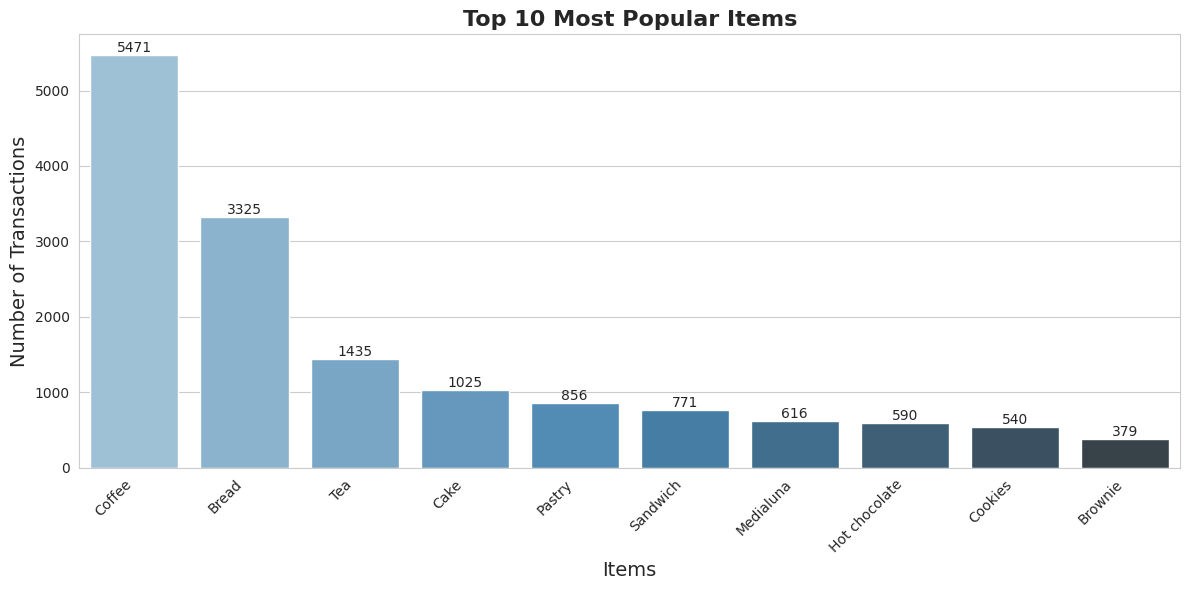

In [14]:
# Membuat bar plot yang lebih sederhana
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot dengan palet warna yang lebih sederhana
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Blues_d")

# Menambahkan label pada sumbu dan judul
plt.title("Top 10 Most Popular Items", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Items", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)

# Anotasi sederhana di atas bar
for i, value in enumerate(val_counts.values()):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

* Sebagian besar transaksi melibatkan Kopi
* Barang terpopuler ke-2 yaitu roti
* Teh adalah barang terpopuler ke-3

Memvisualisasikan fitur/atribut daypart

# Visualisasi transaksi berdasarkan Jam

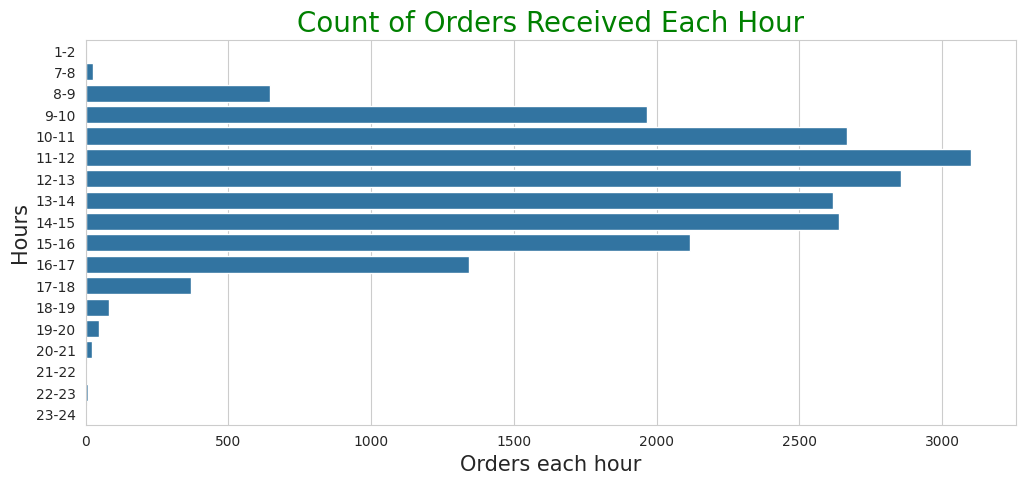

In [15]:
hourTran = df.groupby('hour')['TransactionNo'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "TransactionNo", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of Orders Received Each Hour', color = 'green', size = 20)
plt.show()

['Morning' 'Afternoon' 'Evening' 'Night']


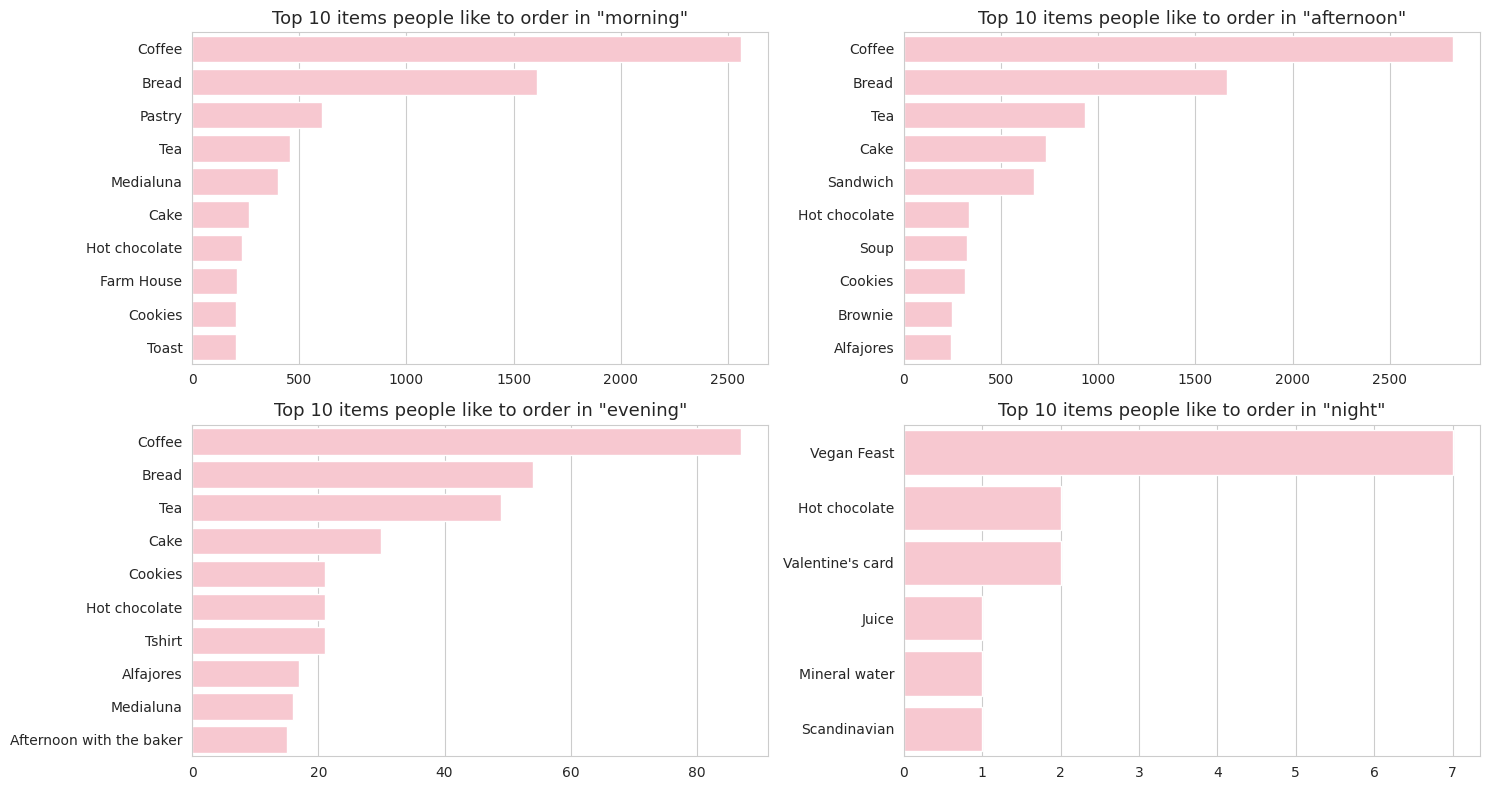

In [16]:
# Cek nilai di kolom Daypart
print(df['Daypart'].unique())

# Lakukan perubahan kecil agar sesuai dengan data
data = df.groupby(['Daypart','Items'])['TransactionNo'].count().reset_index().sort_values(['Daypart','TransactionNo'], ascending=False)
day = ['morning', 'afternoon', 'evening', 'night']

plt.figure(figsize=(15,8))

for i, j in enumerate(day):
    plt.subplot(2, 2, i + 1)

    # Filter data sesuai Daypart, pastikan cocok dengan nilai yang ada di kolom Daypart
    df1 = data[data['Daypart'].str.lower() == j].head(10)

    if not df1.empty:  # Cek apakah data ada untuk bagian hari ini
        sns.barplot(data=df1, y='Items', x='TransactionNo', color='pink')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(f'Top 10 items people like to order in "{j}"', size=13)
    else:
        plt.title(f'No data for "{j}"', size=13)

plt.tight_layout()  # Agar subplot tidak tumpang tindih
plt.show()

In [17]:
daypart = dict(df.groupby('Daypart')['Items'].count().sort_values(ascending=False))

* Menghitung setiap nilai bagian harian dan diurutkan dalam urutan menurun

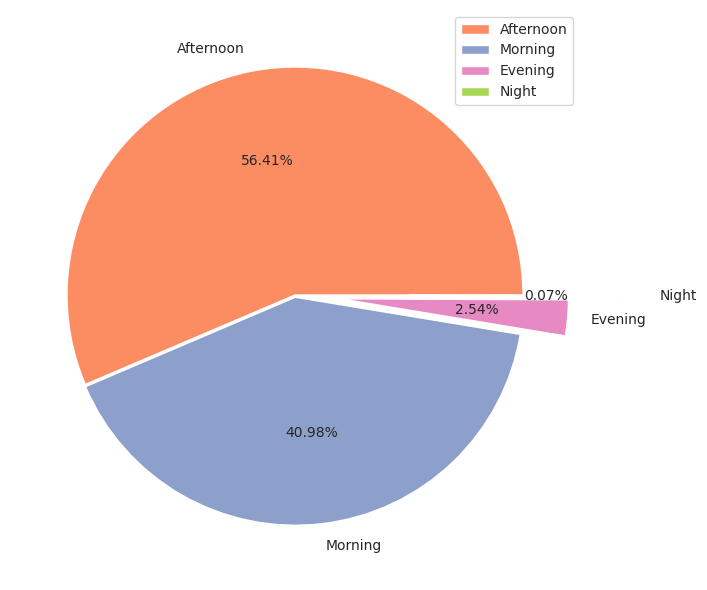

In [18]:
plt.figure(figsize=(10,6))
plt.pie(daypart.values(), labels=daypart.keys(), explode=[0, 0.01, 0.2, 0.5], colors = sns.color_palette("Set2")[1:], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

* Sebagian besar transaksi dilakukan pada sore hari
* 41% transaksi dilakukan di pagi hari
* Transaksi di sore dan malam hari sangat jarang terjadi

Memvisualisasikan fitur DayType  Weekday atau Weekend

In [19]:
daytype = dict(df.groupby("DayType")["Items"].count().sort_values(ascending=False))

* Menghitung setiap nilai bagian harian dan diurutkan dalam urutan menurun

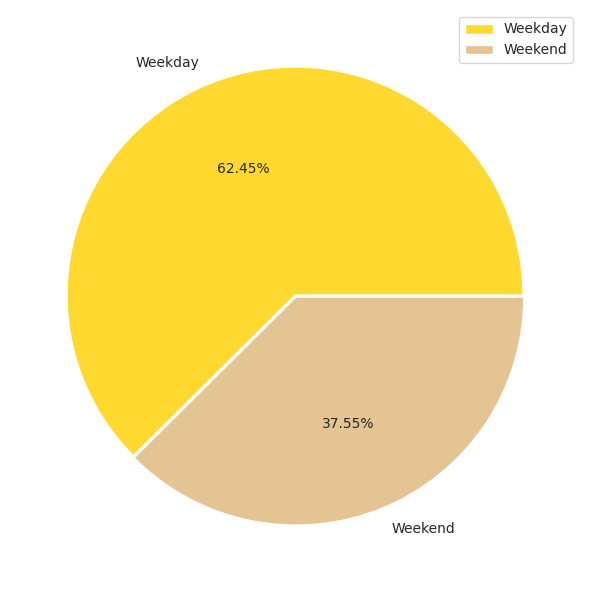

In [20]:
plt.figure(figsize=(10,6))
plt.pie(daytype.values(), labels=daytype.keys(), explode = [0, 0.01], colors = sns.color_palette("Set2")[5:7], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

* Sebagian besar transaksi dilakukan pada weekdays atau hari kerja
* Persentase transaksi di weekend atau hari pekan adalah 37,5%.

Memvisualisasikan fitur weekday atau perharinya

In [21]:
weekday = dict(df.groupby("weekday")["Items"].count().sort_values(ascending=False))

* Menghitung setiap nilai hari kerja dan diurutkan dalam urutan menurun

<Axes: >

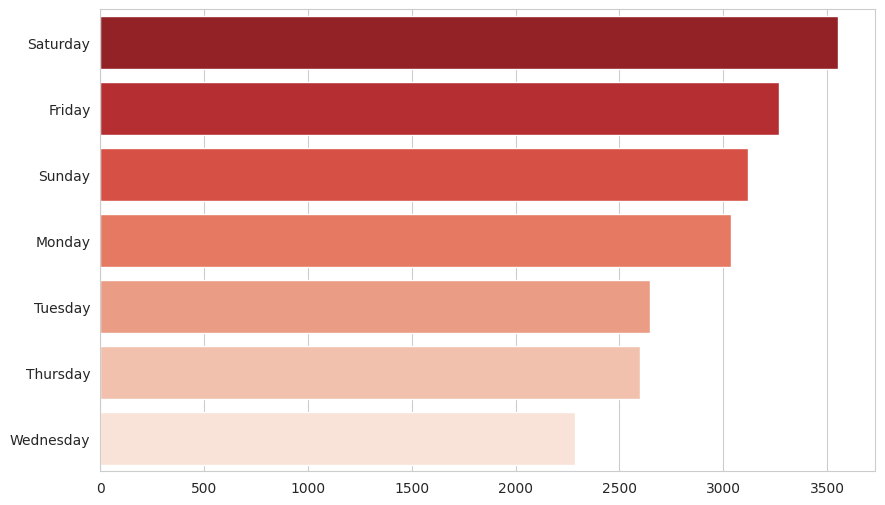

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y=list(weekday.keys()), x=list(weekday.values()), palette="Reds_r", orient = "h")

* Hari yang paling aktif adalah hari Sabtu, Jumat, dan Minggu
* Hari-hari ini adalah akhir pekan atau hari terakhir dari hari kerja seperti hari Jumat
* Hari paling tidak aktif adalah hari Rabu, Kamis, dan Selasa karena hari-hari tersebut adalah hari pertengahan dari hari kerja

Memvisualisasikan fitur/atribut year

In [23]:
year = dict(df.groupby("year")["Items"].count().sort_values(ascending=False))

* Menghitung nilai setiap tahun dan diurutkan dalam urutan menurun

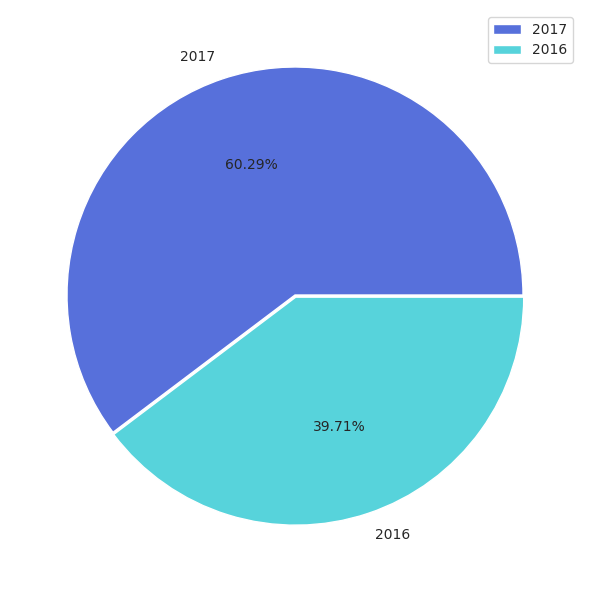

In [24]:
plt.figure(figsize=(10,6))
plt.pie(year.values(), labels=year.keys(), explode = [0, 0.01], colors = sns.color_palette("hls",8)[5:3:-1], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

* Kuartal pertama tahun 2017 lebih aktif dibandingkan kuartal terakhir tahun 2016

Memvisualisasikan fitur/atribut month

 Menghitung nilai setiap bulan dan diurutkan dalam urutan menurun

In [25]:
# Mengelompokkan data berdasarkan bulan dan menghitung jumlah transaksi
monthly_transactions = df.groupby('month')['TransactionNo'].count()

# Jika ingin mengurutkan dari jumlah transaksi terbanyak ke paling sedikit
monthly_transactions = monthly_transactions.sort_values(ascending=False)

# Menampilkan hasil
print(monthly_transactions)

month
3     3220
11    3076
1     3027
2     2748
12    2647
4     1048
10    1041
5      924
7      741
6      739
8      700
9      596
Name: TransactionNo, dtype: int64


<Axes: >

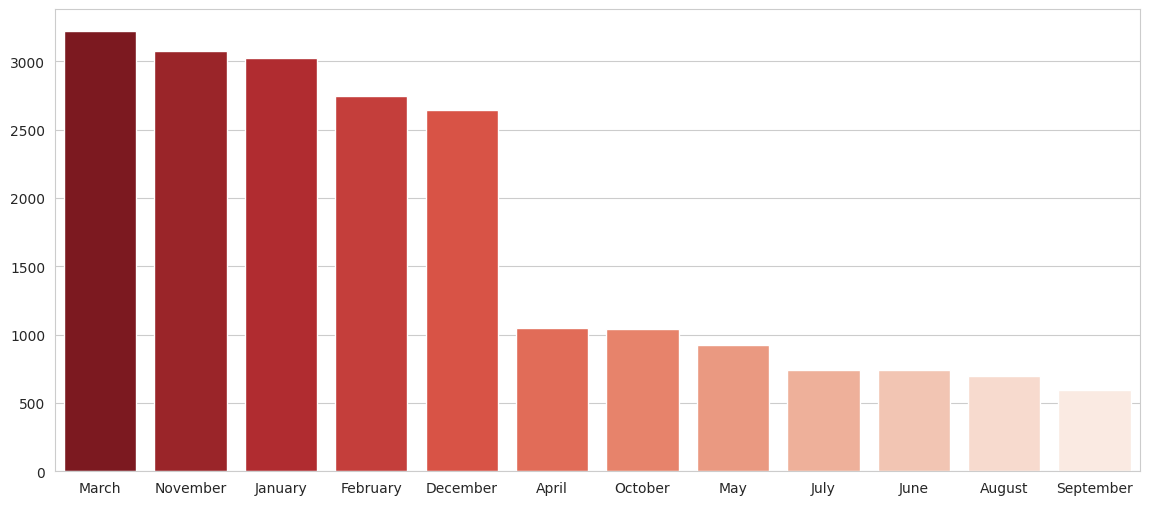

In [26]:
month = dict(df.groupby("month")["TransactionNo"].count().sort_values(ascending=False))
plt.figure(figsize=(14,6))
sns.barplot(x=["March", "November", "January", "February", "December", "April", "October", "May", "July", "June", "August", "September"],
            y=list(month.values()), palette="Reds_r")

* Maret, November dan Januari adalah bulan-bulan yang paling aktif
* Bulan-bulan ini dapat dipertimbangkan dalam sesi musim dingin
* Juni, Agustus dan September adalah bulan-bulan yang paling tidak aktif
* Bulan-bulan ini dapat dipertimbangkan dalam sesi musim panas

### 4 - Preprocess the Data (Untuk menemukan pola yang sering dilakukan)

Mendeteksi item yang paling jarang digunakan

In [27]:
val_counts = df["Items"].value_counts()
val_counts.tail(10)

,count
Items,
Chimichurri Oil,2
Siblings,2
Chicken sand,1
The BART,1
Adjustment,1
Bacon,1
Gift voucher,1
Olum & polenta,1
Raw bars,1


* Item yang muncul dalam transaksi hanya sekali tidak memiliki peluang untuk berada dalam pola yang paling sering
* Jadi mereka harus dihapus, mereka disimpan ke dalam daftar

In [28]:
excluded = list(val_counts[val_counts.values < 2].index)

In [29]:
df2.head(10)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend
6,4,Muffin,2016-10-30 10:08:41,Morning,Weekend
7,5,Coffee,2016-10-30 10:13:03,Morning,Weekend
8,5,Pastry,2016-10-30 10:13:03,Morning,Weekend
9,5,Bread,2016-10-30 10:13:03,Morning,Weekend


Memperoleh transaksi

In [30]:
transactions=[]
for action in df2["TransactionNo"].unique():
    transaction=list(set(df2[df2["TransactionNo"]==action]['Items']))
    if not any(x in transaction for x in excluded):
        if len(transaction) != 1:
            transactions.append(transaction)

* Kami memiliki 20000 entri tetapi sebagian besar dari mereka hanya menunjukkan satu transaksi tetapi ditampilkan dalam beberapa baris
* Jadi mereka harus digabungkan dalam satu transaksi
* Barang yang dibeli hanya sekali tidak dihitung
* Transaksi yang hanya berisi satu barang tidak dihitung karena tidak memiliki peluang untuk menjadi pola yang paling sering terjadi

before filtering, len = 9465

In [31]:
len(transactions)

5510

after filtering, len = 5510

In [32]:
transactions[10:20]

[['Bread', 'Medialuna', 'Pastry'],
 ['Scandinavian', 'Mineral water'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Bread', 'Farm House'],
 ['Bread', 'Medialuna'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Muffin', 'Scandinavian'],
 ['Bread', 'Coffee'],
 ['Bread', 'Jam'],
 ['Muffin', 'Scandinavian']]

------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------